sampling.ipynb

Discussion: This Jupyter notebook investigates sampling squares, triangles, polygons and circles

Licensing: This code is distributed under the GNU LGPL license.
    
Modified: 23 October 2016

Author: John Burkardt, Lukas Bystricky

In [2]:
# Import necessary libraries and set plot option
%matplotlib 
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.spatial as spatial

Using matplotlib backend: agg


# Sampling

In this module we will investigate sampling various geometric regions.

We will concentrate on 2D regions, starting with the easiest case and working 
our way up.

Sampling a geometric region allows us to make estimates of geometric
quantities for which an exact calculation might be difficult.

For our Voronoi project, the calculations we are interested in are
the area, centroid, and "energy" of each of the Voronoi subregions.

In [4]:
#  Estimating Information in a 1D interval
#
#  As in the voronoi notebook, consider 4 generator points in the interval [0,1].
#
#  If we can generate n uniform random samples of the interval, and neari is the number of
#  those samples xj closest to generator gi, and l is the length of our region, then:
#
#  estimated length of subregion i: li = l * ( neari / n )
#  estimated centroid:              ci = sum ( xj ) / neari
#  estimated energy:                ei = li * sum ( xj - gi )**2 / neari
#
#  We do these estimates n= 1000.
#
g = np.array ( [ 1.0/5.0, 2.0/5.0, 3.0/5.0, 4.0/5.0] )

right = np.zeros ( 4 )
left = np.zeros ( 4 )
for i in range ( 0, 4 ):
  if ( i == 0 ):
    left[i] = 0.0
  else:
    left[i] = ( g[i-1] + g[i] ) / 2.0
  if ( i < 3 ):
    right[i] = ( g[i] + g[i+1] ) / 2.0
  else:
    right[i] = 1.0
    
n = 1000
x = np.random.random ( n )

centroid = np.zeros ( 4 )
length = np.zeros ( 4 )
energy = np.zeros ( 4 )
near = np.zeros ( 4 )

for j in range ( 0, n ):
  i = ( np.abs ( g - x[j] ) ).argmin ( )
  near[i] = near[i] + 1
  centroid[i] = centroid[i] + x[j]
  energy[i] = energy[i] + ( g[i] - x[j] ) ** 2

for i in range ( 0, 4 ):
  length[i] = 1.0 * float ( near[i] ) / float ( n )
  centroid[i] = centroid[i] / float ( near[i] )
  energy[i] = length[i] * energy[i] / float ( near[i] )
# 
#  Print i, g[i], left[i], right[i], centroid[i], length[i], energy[i]
#
print ( '' )
print ( ' I            G[I]          Left[I]       Right[I]     Centroid[I]       Length[I]       Energy[I]' )
for i in range ( 0, 4 ):
  print ( '%2d  %14.6f  %14.6f  %14.6f  %14.6f  %14.6f  %14.6f' \
  % ( i, g[i], left[i], right[i], centroid[i], length[i], energy[i] ) )


 I            G[I]          Left[I]       Right[I]     Centroid[I]       Length[I]       Energy[I]
 0        0.200000        0.000000        0.300000        0.143759        0.307000        0.003462
 1        0.400000        0.300000        0.500000        0.396705        0.188000        0.000614
 2        0.600000        0.500000        0.700000        0.600319        0.197000        0.000558
 3        0.800000        0.700000        1.000000        0.855896        0.308000        0.003313


In [5]:
## Approximate 2D Voronoi diagrams by sampling
#
#  As in the Voronoi notebook, let's consider a region which is the unit square,
#  and use 16 generators, simply a tensor product (or "mesh grid") of our
#  original set of 1D values.  (It takes a little bit of trouble to take the
#  2 (4,4) arrays output from meshgrid and pack them into a single (16,2) 
#  array as 
#
#  In the unit square, it is easy to compute n uniform random samples.
#  We call np.random.rand ( n, 2 )
#
g = np.array ( [ 1.0/5.0, 2.0/5.0, 3.0/5.0, 4.0/5.0] )

GX, GY = np.meshgrid ( g, g )
G = np.zeros ( [ 16, 2 ] )
G[:,0] = np.ndarray.flatten ( GX )
G[:,1] = np.ndarray.flatten ( GY )

centroid = np.zeros ( [ 16, 2 ] )
area = np.zeros ( 16 )
energy = np.zeros ( 16 )
near = np.zeros ( 16 )

n = 10000
XY = np.random.rand ( n, 2 )

def nearest ( G, xy ):
  idx = -1
  dmin = np.Inf
  for i in range ( 0, 16 ):
    d = np.linalg.norm ( G[i,:] - xy[:] )    
    if ( d < dmin ):
      idx = i
      dmin = d
  return idx  

for j in range ( 0, n ):
  i = nearest ( G, XY[j,:] )
  near[i] = near[i] + 1
  centroid[i,:] = centroid[i,:] + XY[j,:]
  energy[i] = energy[i] + ( G[i,0] - XY[j,0] ) ** 2 + ( G[i,1] - XY[j,1] ) ** 2
    
for i in range ( 0, 16 ):
  area[i] = 1.0 * float ( near[i] ) / float ( n )
  centroid[i,:] = centroid[i,:] / float ( near[i] )
  energy[i] = area[i] * energy[i] / float ( near[i] )
# 
#  Print i, g[i], centroid[i,:], area[i], energy[i]
#
print ( '' )
print ( ' I            G[I,0]     G[I,1]          Centroid[I,0]  Centroid[I,1]       Area[I]       Energy[I]' )
for i in range ( 0, 16 ):
  print ( '%2d  %14.6f  %14.6f  %14.6f  %14.6f  %14.6f  %14.6f' \
  % ( i, G[i,0], G[i,1], centroid[i,0], centroid[i,1], area[i], energy[i] ) )


 I            G[I,0]     G[I,1]          Centroid[I,0]  Centroid[I,1]       Area[I]       Energy[I]
 0        0.200000        0.200000        0.152912        0.150355        0.088200        0.001749
 1        0.400000        0.200000        0.400769        0.146156        0.061300        0.000858
 2        0.600000        0.200000        0.599287        0.157362        0.058600        0.000753
 3        0.800000        0.200000        0.850003        0.146927        0.086800        0.001759
 4        0.200000        0.400000        0.157440        0.396774        0.062000        0.000761
 5        0.400000        0.400000        0.399457        0.403016        0.039200        0.000256
 6        0.600000        0.400000        0.599368        0.403641        0.044100        0.000293
 7        0.800000        0.400000        0.851058        0.402232        0.057000        0.000757
 8        0.200000        0.600000        0.149949        0.596359        0.056700        0.000786
 9      

# Sampling General Rectangles; Cubes; Hypercubes #

In our example, the x and y coordinates of our region ran from 0 to 1.
Therefore, we felt comfortable with calling the random number generator
to return random numbers r1 and r2 to create a random point (r1,r2) 
in the square.

Suppose our region is not the unit square, but instead, some rectangular
region, with sides still parallel to the coordinate axes, such as:
  (X1,Y2)-----(X2,Y2)
    |         |
  (X1,Y2)-----(X2,Y1)
It turns out that we just need a linear transformation so that r1
becomes a number between X1 and X2, while r2 is between Y1 and Y2:
  s1 = X1 + (X2-X1)*r1
  s2 = Y1 + (Y2-Y1)*r2
    
What happens in 3D, if our region is a 3D block with sides parallel to
coordinate axes, and extents (X1,X2), (Y1,Y2) and (Z1,Z2)?  We just add
  s3 = Z1 + (Z2-Z1)*r3.

It should be obvious that we can slso do this for a rectangular hypercube
in any higher dimension.

# Uniform sampling in a triangle #

To generate uniform random values in a triangle with vertices (A,B,C) 
we have to get two random numbers and then modify the second one:
    
r1 =random
r2 = sqrt ( random )

Now we can compute our blending coefficients:
    
i = 1 - r2
j = ( 1 - r1 ) * r2
k = r1 * r2

And compute a sample point:
    
s = ( i * a + j * b + k * c )



 I            G[I,0]     G[I,1]          Centroid[I,0]  Centroid[I,1]       Area[I]       Energy[I]
 0        2.000000        2.000000        1.528826        1.647866        0.414000        0.394782
 1        3.000000        1.000000        2.935244        0.823659        0.305000        0.146931
 2        3.000000        2.000000        3.020501        1.974266        0.133000        0.023667
 3        3.000000        3.000000        2.753789        3.077630        0.148000        0.042581


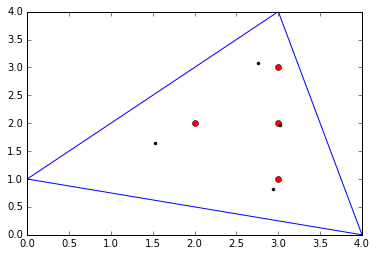

In [30]:
# Let our triangle have the vertices (4,0), (3,4) and (0,1)
#
#  Consider 4 generator points (2,2), (3,1), (3,2), (3,3)
#
#  Using n=1000 samples, estimate the area, centroid, and energy of each subregion.
#
a = np.array ( [4,0] )
b = np.array ( [3,4] )
c = np.array ( [0,1] )

g = np.array ( [ [ 2,2], [3,1], [3,2], [3,3] ] )

triangle_area = 0.5 * ( a[0] * ( b[1] - c[1] ) + b[0] * ( c[1] - a[1] ) + c[0] * ( a[1] - b[1] ) )



area = np.zeros ( 4 )
centroid = np.zeros ( [4,2] )
energy = np.zeros ( 4 )
near = np.zeros ( 4 )

for l in range ( 0, 1000 ):
    r1 = np.random.random ( )
    r2 = np.sqrt ( np.random.random ( ) )
    i = 1 - r2
    j = ( 1 - r1 ) * r2
    k = r1 * r2
    s = ( i * a + j * b + k * c )

def nearest ( G, s ):
  idx = -1
  dmin = np.Inf
  for i in range ( 0, 4 ):
    d = np.linalg.norm ( g[i,:] - s[:] )    
    if ( d < dmin ):
      idx = i
      dmin = d
  return idx  

n = 1000

for l in range ( 0, n ):
    
  r1 = np.random.random ( )
  r2 = np.sqrt ( np.random.random ( ) )
  i = 1 - r2
  j = ( 1 - r1 ) * r2
  k = r1 * r2
  s = ( i * a + j * b + k * c )

  i = nearest ( g, s )
  near[i] = near[i] + 1
  centroid[i,:] = centroid[i,:] + s[:]
  energy[i] = energy[i] + ( g[i,0] - s[0] ) ** 2 + ( g[i,1] - s[1] ) ** 2

for i in range ( 0, 4 ):
  area[i] = 1.0 * float ( near[i] ) / float ( n )
  centroid[i,:] = centroid[i,:] / float ( near[i] )
  energy[i] = area[i] * energy[i] / float ( near[i] )
# 
#  Print i, g[i], centroid[i,:], area[i], energy[i]
#
print ( '' )
print ( ' I            G[I,0]     G[I,1]          Centroid[I,0]  Centroid[I,1]       Area[I]       Energy[I]' )
for i in range ( 0, 4 ):
  print ( '%2d  %14.6f  %14.6f  %14.6f  %14.6f  %14.6f  %14.6f' \
  % ( i, g[i,0], g[i,1], centroid[i,0], centroid[i,1], area[i], energy[i] ) )
#
#  Plot the triangle (blue lines), the generators (red dots)
#  and the centroids (black dots).  
#
#  Do the estimated positions of the centroids seem reasonable?
#
plt.plot ( [ a[0], b[0], c[0], a[0] ], [ a[1], b[1], c[1], a[1] ], 'b-' )
plt.plot ( g[:,0], g[:,1], 'ro' )
plt.plot ( centroid[:,0], centroid[:,1], 'k.' )


# Uniform sampling of a line divided into unequal lengths #

Before we can consider uniform sampling of polygons, it will be helpful
to consider how to handle the following problem:
    
Suppose a line is divided up into N intervals I1, I2, ..., IN of 
lengths L1, L2, ..., LN.  Then consider the partial sums of the
lengths, S0 = 0, S1 = S0 + L1, S2 = S1 + L2, ..., SN = SN-1+LN.

Normalize by dividing by SN: P0 = 0, P1 = S1/SN, P2 = S2/SN, ..., PN=SN/SN=1.
    
One way to sample the line is to choose an interval and then choose a
point in the interval.  If the intervals are of different lengths,
then we need to choose longer intervals more often, and in proportion
to their lengths.  To do that, choose a random number r1 between 0 and 1, and then 
  choose I1 if S0   <= r1 < S1
         I2 if S1   <= r1 < S2
         ...
         IN if SN-1 <= r1 <= SN         
Once we have decided on the interval uniformly, we then have to pick a 
point inside the interval uniformly.  But that just means that if we
have decided to sample interval I7, we need a random value r2
which we then have to linearly transform between S6 and S7.
  s = S6 + (S7-S6)*r2 = S6 + L7 * r2.

In [36]:
# Uniform sampling of a line divided into unequal lengths
#
#  Consider the line segment from 10 to 20, divided into the 
#  subintervals [10,15], [15,16], [16,20].
#
#  If we choose 100 points uniformly, we expect about 50 to be in
#  the first segment, about 10 in the second, and about 40 in the third.
#
#  Put together a code to compute 1000 sample points from this line segment,
#  using the two step process in which you first choose which subinterval
#  to sample, and then choose a point in that subinterval.
#
#  Normally, we'd be interested in the final X values, but for this example,
#  we mainly want to show that we can sample uniformly from unevenly sized
#  intervals if we know how big they are.
#
l = np.array ( [ 5, 1, 4 ] )
print ( l )

s = np.zeros ( 4 )
for i in range ( 1, 4 ):
  s[i] = s[i-1] + l[i-1]
print ( s )

p = np.zeros ( 4 )
p = s / s[3]
print ( p )

count = np.zeros ( 3 )
n = 1000
for j in range ( 0, n ):
  r1 = np.random.random ( )
  for i in range ( 1, 4 ):
    if ( r1 <= p[i] ):
      interval = i - 1
      break
  r2 = np.random.random ( )
  x = s[interval] + l[interval] * r2
  count[interval] = count[interval] + 1
#
#  Print count to verify roughly 500 / 100 / 400 split in interval choice.
#
print ( count )
            

[5 1 4]
[  0.   5.   6.  10.]
[ 0.   0.5  0.6  1. ]
[ 503.  115.  382.]


# Uniform sampling of a polygon #

Suppose our region is a polygon.  As discussed in the polygon notebook,
any polygon can be represented as a collection of triangles.

Therefore, if we wish to sample uniformly from a polygon P, we could 
use a two step process:
* decide which triangle Ti to sample;
* decide which point xj in Ti to sample.

We know how to choose x in T uniformly, because T is a triangle
and we did that in the triangle notebook.

So how do we do step 1 so that the process is uniform?
All we have to do is choose triangles with a frequency proportional
to their area, since that "counts" how many points are in that triangle.
But that is the same as the problem of sampling unequal line segments uniformly.

In other words, we prepare for step 1 by computing the area Ai 
of each triangle Ti, creating an increasing sequence of numbers P 
which are spaced proportionally to the triangle areas, select a random
number r1, and use that to select triangle Ti.

In [25]:
# Uniform sampling of a polygon #
#
#  We'll use a simple quadrilateral made up of two triangles, 
#  one having twice the area of the other.
#
#  1  (3)---*---(2)
#  |  | \  T1  /    
#  Y  |  \    /
#  |  |T0 \  /
#  0 (0)--(1)
#   
#     0----1-----2---X
#
#  Prepare:
#
#    Define a list XY of 4 point coordinates.
#    Define the polygon P as two triangles, that is, 2 rows of 3 indices into XY.
#    Compute the areas of T0, T1 and P.
#    Compute the array of S values.
#
#  Sample:
#
#    Compute 1000 random samples of the polygon.
#    Estimate the area and centroid of each triangle.
#    (We can't compute the energy, because we didn't 
#    pick generator points in each triangle)
#
xy = np.array ( [ [0.0,0.0], [1.0,0.0], [2.0,1.0], [0.0,1.0] ] )

p = np.array ( [ [ 0, 1, 3 ], [ 1, 2, 3 ] ] )

a0 = 0.5 * ( xy[p[0,0],0] * ( xy[p[0,1],1] - xy[p[0,2],1])\
           + xy[p[0,1],0] * ( xy[p[0,2],1] - xy[p[0,0],1])\
           + xy[p[0,2],0] * ( xy[p[0,0],1] - xy[p[0,1],1]) )
    
a1 = 0.5 * ( xy[p[1,0],0] * ( xy[p[1,1],1] - xy[p[1,2],1])\
           + xy[p[1,1],0] * ( xy[p[1,2],1] - xy[p[1,0],1])\
           + xy[p[1,2],0] * ( xy[p[1,0],1] - xy[p[1,1],1]) )

ap = a0 + a1

s = np.array ( [ a0 / ( a0 + a1 ), ( a0 + a1 ) / ( a0 + a1 ) ] )

hit = np.zeros ( 2 )
centroid = np.zeros ( [ 2, 2 ] )

n = 1000

for j in range ( 0, n ):
#
#  Select triangle IT.
#
  r0 = np.random.random ( )
  if ( r0 < s[0] ):
    it = 0
  else:
    it = 1
    
  hit[it] = hit[it] + 1
#
#  Select point S in triangle IT.
#
  r1 = np.random.random ( )
  r2 = np.sqrt ( np.random.random ( ) )

  i = 1 - r2
  j = ( 1 - r1 ) * r2
  k = r1 * r2
  sample = i * xy[p[it,0],:] + j * xy[p[it,1],:] + k * xy[p[it,2],:]
    
  centroid[it,:] = centroid[it,:] + sample

print ( '' )
print ( '  IT  Hits            Area       CentroidX       CentroidY' )
print ( '' )
for it in range ( 0, 2 ):
    centroid[it,:] = centroid[it,:] / float ( hit[it] )
    area_est = ap * float ( hit[it] )/ float ( n )
    print ( '  %2d  %4d  %14.6f  %14.6f  %14.6f' % ( it, hit[it], area_est, centroid[it,0], centroid[it,1] ) )
#
#  The correct areas are 0.5 and 1.0
#

[ 0.33333333  1.        ]

  IT  Hits            Area       CentroidX       CentroidY

   0   342        0.513000        0.359181        0.329075
   1   658        0.987000        1.011538        0.672720


# Uniform Sampling of a Circle #

Another region we often want to sample is a circle.

One way to sample from a circle is to sample from the square that surrounds
the circle, and discard points that are not actually in the circle.  This 
means that sometimes you have to try more than once just to get a single
acceptable point.

Another way is more direct.  Here we sample the unit circle (center (0,0), radius 1):

r1 = random number
r2 = random number

r = sqrt ( r1 )
t = 2.0 * pi * r2

x = r * cos ( t )
y = r * sin ( t )

In [33]:
# Uniform sampling of a circle
#
#  So we will work with the unit circle.
#
#  We will do an approximate Voronoi analysis for the generator points
#  g = { [0,-0.5], [0,0.5], [0.0,0.75] }
#  If you plot these points, you can see the the Voronoi "polygon" for the
#  first point will be the lower half of the circle, while the second point
#  will have more area associated with it than the third point will.
#
#  We will sample with 1000 points and estimate the area, centroids, and energy.
#
g = np.array ( [ [0.0,-0.5], [0.0, 0.5], [0.0,0.75] ] )

hits = np.zeros ( 3 )
area = np.zeros ( 3 )
centroid = np.zeros ( [ 3, 2 ] )
energy = np.zeros ( 3 )
area_circle = np.pi
                
n = 10000
                
for j in range ( 0, n ):
  r1 = np.random.random ( )
  r2 = np.random.random ( )
  r = np.sqrt ( r1 )
  t = 2.0 * np.pi * r2
  xy = np.array ( [ r * np.cos ( t ), r * np.sin ( t ) ] )
  nearest = -1
  dist = np.Inf
  for i in range ( 0, 3 ):
    d = np.linalg.norm ( xy - g[i,:])
    if ( d < dist ):
      nearest = i
      dist = d
  hits[nearest] = hits[nearest] + 1
  centroid[nearest,:] = centroid[nearest,:] + xy[:]
  energy[nearest] = energy[nearest] + ( xy[0] - g[nearest,0] )**2 + ( xy[1] - g[nearest,1] )**2
                 
for i in range ( 0, 3 ):
  centroid[i,:] = centroid[i,:] / float ( hits[i] )
  area[i] = area_circle * float ( hits[i] ) / float ( n )
  energy[i] = area[i] * energy[i] / float ( hits[i] ) 

for i in range ( 0, 3 ):
  print ( '%2d  %3d  %14.6f  %14.6f  %14.6f  %14.6f  %14.6f  %14.6f' \
    % ( i, hits[i], g[i,0], g[i,1], area[i], centroid[i,0], centroid[i,1], energy[i] ))

 0  5062        0.000000       -0.500000        1.590274       -0.005251       -0.425194        0.517778
 1  3649        0.000000        0.500000        1.146367        0.006751        0.302887        0.415091
 2  1289        0.000000        0.750000        0.404951        0.013395        0.780412        0.054550
